In [1]:
!pip install -q tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python
!pip install -q matplotlib

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

grpcio-status 1.43.0 requires grpcio>=1.43.0, but you'll have grpcio 1.41.1 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [3]:
spec = model_spec.get('efficientdet_lite0') # maybe different lite1-4

In [4]:
def read_train_val_test(dataset_dir, label_map):
    return tuple(map(lambda set_: object_detector.DataLoader.from_pascal_voc(images_dir=os.path.join(dataset_dir, set_), annotations_dir=os.path.join(dataset_dir, set_), label_map=label_map), ("train", "val", "test")))

In [5]:
text_file = open("./assets/list_promis.txt", "r")
query_array = text_file.read().split(',\n')
print(query_array)

['LewisHamilton', 'SebastianVettel', 'MaxVerstappen', 'KarlLauterbach', 'CristianoRonaldo', 'LionelMessi', 'EdSheeran', 'TomCruise', 'HeleneFischer', 'Rihanna', 'GüntherJauch', 'StefanRaab', 'HeidiKlum', 'Nena', 'ManuelNeuer', "ElyasM'barek", 'JudithRakers', 'AngelaMerkel', 'WladimirPutin', 'OlafScholz', 'JoeBiden', 'DonaldTrump', 'ChristianLindner', 'AnnalenaBaerbock', 'ElonMusk', 'JeffBezos', 'BarackObama', 'ChrisPratt', 'XiJinping', 'DwayneJohnson', 'MacKenzieScott', 'AnthonyFauci']


In [6]:
print(os.getcwd())

datapath = os.getcwd() + "/dataset/"
outpath = os.getcwd() + "/models/"

/tf/src/images


In [7]:
labelmap = query_array
train_data, validation_data, test_data = read_train_val_test(datapath, labelmap)

In [8]:
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=validation_data)

Epoch 1/50
560/560 [==============================] - 265s 443ms/step - det_loss: 1.3926 - cls_loss: 1.1539 - box_loss: 0.0048 - reg_l2_loss: 0.0685 - loss: 1.4611 - learning_rate: 0.0090 - gradient_norm: 2.0549 - val_det_loss: 0.9996 - val_cls_loss: 0.8899 - val_box_loss: 0.0022 - val_reg_l2_loss: 0.0687 - val_loss: 1.0682
Epoch 2/50
560/560 [==============================] - 242s 431ms/step - det_loss: 0.9096 - cls_loss: 0.7862 - box_loss: 0.0025 - reg_l2_loss: 0.0688 - loss: 0.9785 - learning_rate: 0.0100 - gradient_norm: 2.2765 - val_det_loss: 0.8685 - val_cls_loss: 0.8039 - val_box_loss: 0.0013 - val_reg_l2_loss: 0.0690 - val_loss: 0.9375
Epoch 3/50
560/560 [==============================] - 240s 429ms/step - det_loss: 0.8502 - cls_loss: 0.7467 - box_loss: 0.0021 - reg_l2_loss: 0.0690 - loss: 0.9192 - learning_rate: 0.0099 - gradient_norm: 1.9833 - val_det_loss: 0.8807 - val_cls_loss: 0.8075 - val_box_loss: 0.0015 - val_reg_l2_loss: 0.0691 - val_loss: 0.9498
Epoch 4/50
560/560 [==

Epoch 26/50
560/560 [==============================] - 231s 412ms/step - det_loss: 0.4182 - cls_loss: 0.3665 - box_loss: 0.0010 - reg_l2_loss: 0.0736 - loss: 0.4919 - learning_rate: 0.0047 - gradient_norm: 3.1919 - val_det_loss: 0.4432 - val_cls_loss: 0.4118 - val_box_loss: 6.2863e-04 - val_reg_l2_loss: 0.0737 - val_loss: 0.5169
Epoch 27/50
560/560 [==============================] - 231s 413ms/step - det_loss: 0.4116 - cls_loss: 0.3609 - box_loss: 0.0010 - reg_l2_loss: 0.0738 - loss: 0.4854 - learning_rate: 0.0044 - gradient_norm: 3.2793 - val_det_loss: 0.4837 - val_cls_loss: 0.4521 - val_box_loss: 6.3203e-04 - val_reg_l2_loss: 0.0738 - val_loss: 0.5575
Epoch 28/50
560/560 [==============================] - 230s 410ms/step - det_loss: 0.4029 - cls_loss: 0.3517 - box_loss: 0.0010 - reg_l2_loss: 0.0739 - loss: 0.4768 - learning_rate: 0.0040 - gradient_norm: 3.2003 - val_det_loss: 0.4560 - val_cls_loss: 0.4249 - val_box_loss: 6.2279e-04 - val_reg_l2_loss: 0.0739 - val_loss: 0.5299
Epoch 2

In [9]:
model.evaluate(test_data)

15/15 [==============================] - 61s 2s/step



{'AP': 0.7237395,
 'AP50': 0.8648869,
 'AP75': 0.82601684,
 'APs': 0.0,
 'APm': 0.6013706,
 'APl': 0.7477276,
 'ARmax1': 0.7632292,
 'ARmax10': 0.8486458,
 'ARmax100': 0.85260415,
 'ARs': 0.0,
 'ARm': 0.75363624,
 'ARl': 0.8708063,
 'AP_/LewisHamilton': 0.59183365,
 'AP_/SebastianVettel': 0.5634225,
 'AP_/MaxVerstappen': 0.6620355,
 'AP_/KarlLauterbach': 0.83844626,
 'AP_/CristianoRonaldo': 0.8194715,
 'AP_/LionelMessi': 0.5314634,
 'AP_/EdSheeran': 0.78555,
 'AP_/TomCruise': 0.8437527,
 'AP_/HeleneFischer': 0.65392405,
 'AP_/Rihanna': 0.68375546,
 'AP_/GüntherJauch': 0.8339268,
 'AP_/StefanRaab': 0.737235,
 'AP_/HeidiKlum': 0.68442434,
 'AP_/Nena': 0.42089033,
 'AP_/ManuelNeuer': 0.6307566,
 "AP_/ElyasM'barek": 0.8201189,
 'AP_/JudithRakers': 0.7498005,
 'AP_/AngelaMerkel': 0.7699921,
 'AP_/WladimirPutin': 0.65123343,
 'AP_/OlafScholz': 0.7599088,
 'AP_/JoeBiden': 0.64726394,
 'AP_/DonaldTrump': 0.57540333,
 'AP_/ChristianLindner': 0.70736414,
 'AP_/AnnalenaBaerbock': 0.8171253,
 'AP_

In [10]:
model.export(export_dir=outpath)

In [11]:
import time

import cv2
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def to_json(self):
        return {
            "x": self.x,
            "y": self.y,
        }

    def __str__(self):
        return str(self.to_json())

class BoundingBox:
    def __init__(self, xmin, ymin, xmax, ymax):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        self.center = Point((xmin + xmax) // 2, (ymin + ymax) // 2)
        self.width = xmax - xmin
        self.height = ymax - ymin
        self.area = self.width * self.height

    def to_json(self):
        return {
            "xmin": self.xmin,
            "ymin": self.ymin,
            "xmax": self.xmax,
            "ymax": self.ymax,
        }

    def __str__(self):
        return str(self.to_json())

class Detection:
    def __init__(self, class_, confidence, xmin, ymin, xmax, ymax):
        self.class_ = class_
        self.confidence = confidence
        self.bounding_box = BoundingBox(xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax)

    def to_json(self):
        return {
            "class": self.class_,
            "confidence": self.confidence,
            "box": self.bounding_box.to_json(),
        }

    def __str__(self):
        return str(self.to_json())


class EfficientDetLite:
    def __init__(self, model_path, labelmap):
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()

        # iti = input tensor index
        input_details = self.interpreter.get_input_details()
        self.iti_image = input_details[0]["index"]
        self.it_image_dtype = input_details[0]["dtype"]
        self.it_image_width = input_details[0]["shape"][2]
        self.it_image_height = input_details[0]["shape"][1]

        # oti = output tensor index
        output_details = self.interpreter.get_output_details()
        self.oti_bounding_boxes = output_details[1]["index"]
        self.oti_classes = output_details[3]["index"]
        self.oti_confidences = output_details[0]["index"]

        self.labelmap = labelmap

    def detect(self, image, threshold=0):
        input_tensor = self.prepare_image(image)
        self.interpreter.set_tensor(self.iti_image, input_tensor)
        self.interpreter.invoke()

        bounding_boxes = self.interpreter.get_tensor(self.oti_bounding_boxes)[0]
        classes = self.interpreter.get_tensor(self.oti_classes)[0]
        confidences = self.interpreter.get_tensor(self.oti_confidences)[0]
        detections = zip(classes, bounding_boxes, confidences)
        detections = filter(lambda x: x[2] >= threshold, detections)

        def tensors2detection(x):
            def clamp(n, min_, max_):
                return max(min(max_, n), min_)

            xmin = clamp(int(round(x[1][1] * image.shape[1])), 0, image.shape[1])
            ymin = clamp(int(round(x[1][0] * image.shape[0])), 0, image.shape[0])
            xmax = clamp(int(round(x[1][3] * image.shape[1])), 0, image.shape[1])
            ymax = clamp(int(round(x[1][2] * image.shape[0])), 0, image.shape[0])
            name = str(self.labelmap[int(x[0])])
            confidence = float(x[2])

            detection = Detection(name, confidence, xmin, ymin, xmax, ymax)
            return detection

        detections = map(lambda x: tensors2detection(x), detections)
        detections = list(detections)
        return detections

    def prepare_image(self, image):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (self.it_image_width, self.it_image_height), interpolation=cv2.INTER_NEAREST)
        tensor = np.reshape(image, (1, self.it_image_height, self.it_image_width, 3))
        tensor = tensor.astype(self.it_image_dtype)
        return tensor

def show_image(image, label=None, scale=1):
    show_images([image], labels=[label] if label is not None else None, scale=scale)


def show_images(images, labels=None, scale=1):
    figsize = plt.rcParams["figure.figsize"]
    plt.figure(figsize=(figsize[0] * scale, figsize[1] * scale))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(image, cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()


def show_detection(image, detection, scale=1, thickness=1, colors=None, confidence=True):
    show_image(draw_detections(image,
                               [detection],
                               scale=scale,
                               thickness=thickness,
                               colors=colors,
                               confidence=confidence))


def show_detections(image, detections, scale=1, thickness=1, colors=None, confidence=True):
    show_image(draw_detections(image,
                               detections,
                               scale=scale,
                               thickness=thickness,
                               colors=colors,
                               confidence=confidence))


def draw_detection(image, detection, scale=1, thickness=1, colors=None, confidence=True):
    return draw_detections(image, [detection], scale, thickness, colors, confidence)


def draw_detections(image, detections, scale=1, thickness=1, colors=None, confidence=True):
    colors = {} if colors is None else {k: tuple(reversed(v)) for k, v in colors.items()}
    result = image.copy()
    for detection in detections:
        xmin = int(detection.bounding_box.xmin)
        ymin = int(detection.bounding_box.ymin)
        xmax = int(detection.bounding_box.xmax)
        ymax = int(detection.bounding_box.ymax)
        color = colors.get(detection.class_)
        if color is None:
            color = (0, 0, 0)
        result = cv2.rectangle(result, (xmin, ymin), (xmax, ymax), color, thickness)
        if confidence:
            text = "{:.2f}".format(float(detection.confidence))
            font = cv2.FONT_HERSHEY_SIMPLEX
            textsize = cv2.getTextSize(text, font, scale, thickness)[0]
            result = cv2.putText(result,
                                 text,
                                 (
                                     ((xmin + xmax) - textsize[0]) // 2,
                                     ((ymin + ymax) + textsize[1]) // 2
                                 ),
                                 font,
                                 scale,
                                 color,
                                 thickness,
                                 cv2.LINE_AA)
    return result

In [12]:
model = EfficientDetLite(outpath + 'model.tflite', labelmap)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 41  50  53]
  [ 41  50  53]
  [ 41  50  53]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 40  49  52]
  [ 41  50  53]
  [ 41  50  53]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 38  47  50]
  [ 38  47  50]
  [ 38  47  50]]

 ...

 [[ 34  33 179]
  [ 33  32 178]
  [ 32  32 176]
  ...
  [ 30  39  42]
  [ 35  42  45]
  [ 35  42  45]]

 [[ 60  59 205]
  [ 34  33 179]
  [ 37  36 182]
  ...
  [ 29  38  41]
  [ 34  41  44]
  [ 65  72  75]]

 [[ 60  59 205]
  [ 34  33 179]
  [ 37  36 182]
  ...
  [ 29  38  41]
  [ 34  41  44]
  [ 65  72  75]]]
{'class': 'AnnalenaBaerbock', 'confidence': 0.8671875, 'box': {'xmin': 116, 'ymin': 115, 'xmax': 340, 'ymax': 336}}


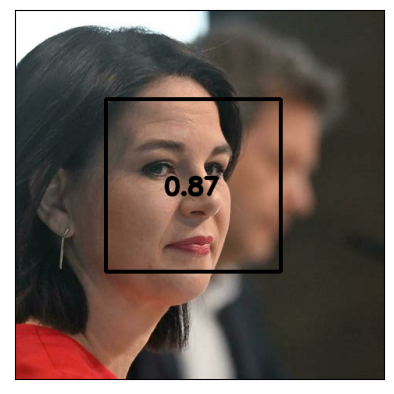

In [49]:
image = cv2.imread(datapath + 'test/130_238987cf.jpg') # change to exisiting image

print(image)

detections = model.detect(image, threshold=0.6)

for detection in detections:
  print(detection)

show_detections(image, detections, thickness=4)